# Modeling and Analysis of Total Fitness Factor Score for CSUF College Students

## Group Members
- Paul Anthony Bagabaldo
- Joksan Hernandez
- Huyen Nguyen

## Project Advisor
Professor Kenytt Avery

## Acknowledgements
Dr. Bill Beam (Department of Kinesiology), Dr. Archana McEligot (Department of Public Health), and Dr. Sinjini Mitra (Department of Information Systems and Decision Sciences) at California State University, Fullerton, for providing the data used in this project.

## Table of Contents 
<a id="TOC"></a>
1. [Introduction](#Introduction)
2. [Data Description](#Data-Description)
3. [Data Preprocessing](#Data-Preprocessing)
4. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
   - [Gender Analysis](#Gender-Analysis)
   - [Age Analysis](#Age-Analysis)
   - [Resting Heart Rate Analysis](#Resting-Heart-Rate-Analysis)
   - [Weight Analysis](#Weight-Analysis)
   - [Stage Completion Analysis](#Stage-Completion-Analysis)
   - [Grip Strength Analysis](#Grip-Strength-Analysis)
   - [Skinfold Thickness Analysis](#Skinfold-Thickness-Analysis)
   - [Vital Capacity Analysis](#Vital-Capacity-Analysis)
   - [Heart Rate at Stage 2 Analysis](#Heart-Rate-at-Stage-2-Analysis)
5. [Modeling and Analysis](#Modeling-and-Analysis)
6. [Results](#Results)
7. [Conclusion](#Conclusion)
8. [References](#References)


## Introduction
<a id="Introduction"></a>

Physical Fitness plays a large role in the overall health and well being of college students. These factors influencing fitness can help in designing targeted interventions to promote healthier lifestyles. Researchers at California State University, Fullerton (CSUF), in collaboration with various departments, have collected data on health and fitness-related variables for a long-term study. 

The goal of this project is to approximate the **Total Fitness Factor Score (FFTotal)** using other variables in the dataset. In this project, we will be using **explatory data analysis**, **linear regression modeling**, and **performance evaluation** to better understand the data. 

## Data Description
<a id="Data-Description"></a>

The dataset consists of various health and fitness-related variables collected as part of fitness testing among students at California State University, Fullerton. Below is a summary of the key variables used in the analysis:

### Demographic Information
- **Idnum**: A random identification number assigned at the conclusion of the semester.
- **Date**: The date or semester during which the test was conducted.
- **Phone**: Last four digits of the self-reported phone number for matching data.
- **Sex**: Gender of the subject (Female = F, Male = M).
- **Age**: Self-reported age in years.
- **Ethnicity**: Self-reported ethnicity (categories include Caucasian, Hispanic/Latino, African American, Native American, Asian, Pacific Islander, or Other).

### Anthropometric Measurements
- **Height (Ht)**: Height measured using a stadiometer to the closest 0.25 inches.
- **Weight (Wt)**: Weight measured using an electronic scale to the closest 0.1 lb.
- **BIA % Fat**: Body fat percentage measured using bioelectrical impedance analysis (BIA).
- **Waist Girth**: Measured at the "minimal" natural waist in centimeters.
- **Skinfold Measurements (SF 1, SF 2, SF 3)**: Skinfold thickness (in millimeters) at various sites:
  - SF1: Chest (male) or triceps (female).
  - SF2: Abdomen (male) or suprailium (female).
  - SF3: Thigh (both genders).

### Fitness and Physical Performance
- **Forward Flexion (FF)**: Sit-and-reach test result, best of three trials, measured to the closest 0.5 inch.
- **Right Grip Max (RGM)** and **Left Grip Max (LGM)**: Maximal grip strength for each hand (in kilograms).
- **Vital Capacity (VC)**: Lung capacity measured using a Vitalometer (in liters).
- **Stages**: Number of stages completed on a cycle ergometer test (range: 2–4 stages).
- **Power and Heart Rate per Stage (PL 1-4, HR 1-4)**: Power (in watts) and heart rate (in bpm) for each stage of the cycle ergometer test.
- **Rate of Perceived Exertion (RPE 1-4)**: Self-reported exertion at the end of each stage.

### Cardiovascular and Environmental Data
- **Resting HR**: Resting heart rate (in bpm), self-reported or measured.
- **Systolic BP (SBP)** and **Diastolic BP (DBP)**: Brachial systolic and diastolic blood pressure (in mmHg), measured in a seated position.
- **Ambient Temperature (TA)**: Temperature of the testing environment in degrees Celsius.
- **Barometric Pressure (PB)**: Measured barometric pressure (in mmHg).

### Risk Factors
- **RF 2**: Gender-based risk factor (Female = 1, Male = 5).
- **RF 3**: Stress score based on 11 questions (range: 11–55).
- **RF 4**: Family history of cardiovascular disease (CVD) categorized into severity levels.
- **RF 5**: Smoking history, self-reported (categories based on number of cigarettes/day).

### Outcome Variable
- **Total Fitness Factor Score (FFTotal)**: The primary outcome variable, representing an overall fitness metric calculated using a proprietary formula.


[Back to Top](#TOC)

## Data Preprocessing
<a id="Data-Preprocessing"></a>

### Imports and Loading the Data

In [1]:
import pandas as pd
import numpy as np
from lets_plot import *
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import r2_score, mean_squared_error
LetsPlot.setup_html()

df = pd.read_csv('totalFitnessFactor.csv')

df = df.dropna(axis=1, how='all')

The initial dataset was loaded from 'totalFitnessFactor.csv'. Empty columns were identified and removed. This step removed columns containing only NA values, reducing noise and improving data quality for analysis.

In [2]:
# Calculate the missing statistics
missing_stats = (
   df.isnull()
       .sum()
       .sort_values(ascending=False)
       .to_frame('Missing Count')
       .join(
           (df.isnull().mean() * 100)
           .round(2)
           .to_frame('Missing %')
       )
       [lambda x: x['Missing Count'] > 0]
)

# Display the missing statistics
(
missing_stats
    .style
    .format({
        'Missing Count': '{:,.0f}',
        'Missing %': '{:.2f}%'
    })
    .background_gradient(cmap='Blues')
)

,Missing Count,Missing %
Waist,"5,528",88.08%
BIA_percent_Fat,"4,680",74.57%
SF 2,"1,596",25.43%
SF 3,"1,596",25.43%
SF 1,"1,596",25.43%
RPE 3,393,6.26%
HR 3,380,6.05%
PL 3,380,6.05%


After reviewing the dataset using Python, we found that the columns Waist and BIA % Fat had significant amounts of missing data, with 88.08% and 74.57% of their values missing, respectively. Given the high percentage of missing values, we decided to exclude these columns from the analysis.

In contrast, the columns SF 1, SF 2, and SF 3 had about 25.43% of their values missing. While this is not ideal, these columns still contain enough data to potentially provide valuable insights, so they were retained for further exploration.

Lastly, there were several other columns, such as PL 3 (6.05%), HR 3 (6.05%), and RPE 3 (6.26%), that had only a small proportion of missing data. Given that these gaps were minimal, we concluded that keeping these columns would not significantly impact the results.

In [3]:
# Calculate the missing percentage for each column
missing_percentage = df.isnull().mean() * 100

# Clean the data by removing columns with more than 30% missing values
df_cleaned = df.loc[:, missing_percentage <= 30]
df_cleaned.columns

#Display the retained columns
retained_cols = pd.DataFrame({
   'Column Name': df_cleaned.columns.tolist(),
   'Data Type': df_cleaned.dtypes.values,
   'Non-null Count': df_cleaned.count().values
}).set_index('Column Name')

(
retained_cols
   .style
   .set_table_styles([
       {'selector': 'thead',
        'props': [('background-color', '#2c3e50'), 
                 ('color', 'white'),
                 ('font-weight', 'bold')]},
   ])
   .format({'Non-null Count': '{:,d}'})
)

,Data Type,Non-null Count
Column Name,,
Idnum,object,"6,276"
Date,object,"6,276"
Sex,object,"6,276"
Age,int64,"6,276"
Ht,float64,"6,276"
Wt,float64,"6,276"
RF 2,int64,"6,276"
RF 3,int64,"6,276"
RF 4,int64,"6,276"


[Back to Top](#TOC)

## Explatory Data Analysis
<a id = "Exploratory-Data-Analysis"> </a>

### Gender Analysis
<a id="Gender-Analysis"></a>

#### Distribution of Fitness Scores by Gender (Boxplot and Histogram) ####


**Boxplot:**

- Female subjects tend to have a lower FFTotal score than males.
- Males have outliers within their distribution extending past the lower fence.

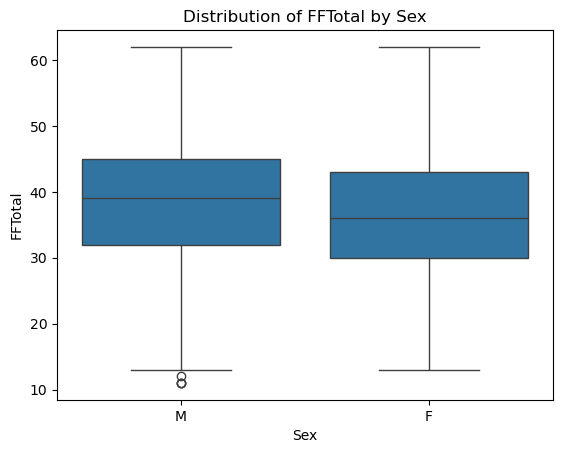

In [4]:
sns.boxplot(data=df_cleaned, x='Sex', y='FFTotal')
plt.title('Distribution of FFTotal by Sex')
plt.show()

**Histogram:**

- Unimodal distribution indicates FFTotal for both sexes mainly range between 25-45.
- Symmetric distrubition indicates data has a normal distribution where most data points cluster around the middle and taper off towards both ends. 

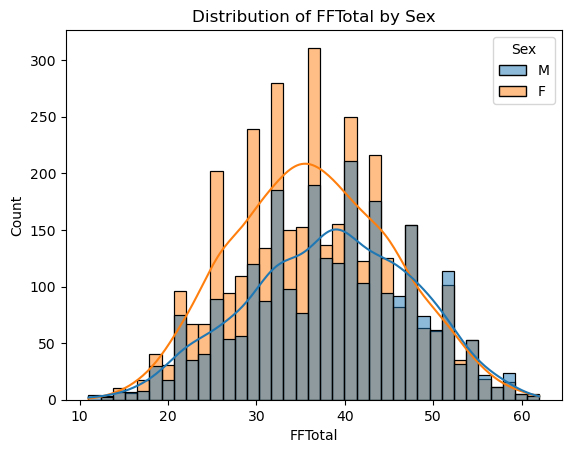

In [5]:
sns.histplot(data=df_cleaned, x='FFTotal', hue='Sex', kde=True)
plt.title('Distribution of FFTotal by Sex')
plt.show()


**Analysis:**

Since there is a clear distribution indicated in both the boxplot and histogram charts, we can conclude that Sex might be an important factor in calculating FFTotal.
We need to take into account gender when calculating FFTotal scores since we can see that females on average generally have a lower score than males.

### Age Analysis
<a id="Age-Analysis"></a>

#### Correlation Between Age and Fitness Scores (Boxplot and Scatterplot)

**Boxplot:**

- Boxplot distribution between ages aren't very different, indicates that FFTotal can vary and is not dependent on Age. 
- The sample age range is also very small (18-25) so that's another reason why we probably don't see much impact on FFTotal regarding age.

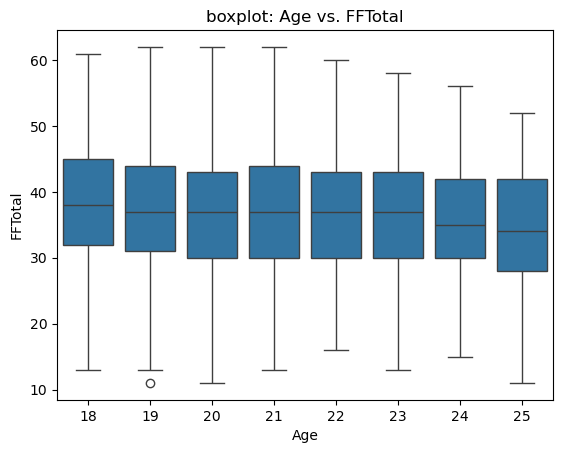

In [6]:
sns.boxplot(data=df_cleaned, x='Age', y='FFTotal')
plt.title('boxplot: Age vs. FFTotal')
plt.show()

**Scatterplot:**

- Age ranges from 18-25, very limited range so we don't know if Age would be a useful variable to use when calculating FFTotal since we don't have older test sujects to gauge the difference in young vs old age.
- There seems to be no apparent relationship between Age and FFTotal as there are points at every range of FFTotal between all ages.

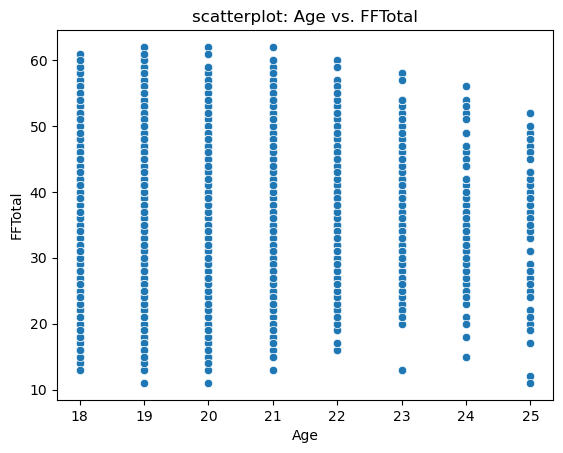

In [7]:
sns.scatterplot(data=df_cleaned, x='Age', y='FFTotal')
plt.title('scatterplot: Age vs. FFTotal')
plt.show()

**Analysis:**

We would recommend against using this variable as part of calculating FFTotal since there seems to be no correlation between Age and FFTotal and the sample age range is also limited so we can't truly see the impact young vs old age would have on the fitness score

### Resting Heart Rate Analysis
<a id="Resting-Heart-Rate-Analysis"></a>

#### Relationship Between Resting Heart Rate and Fitness Scores (Scatterplot and Categorization)


**ScatterPlot:**

- The scatterplot shows high variability with each heart rate level. There are many individuals with similar heart rates but very different fitness scores. 
- The coorelation is not strong enough to warrant as a primary indicator but may be used in conjunction with other variables. 
- Most common range appears to be between 60-80 bpm.
- The lower the resting heart rate, the higher the total fitness scores. 

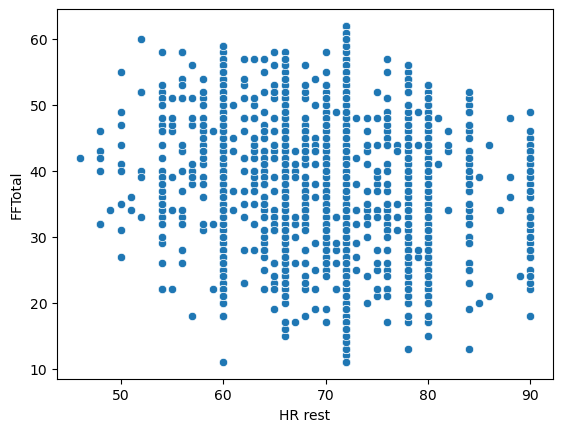

In [8]:
sns.scatterplot(data=df_cleaned, x='HR rest', y='FFTotal')
plt.show()

In [9]:
df['HR_Category'] = pd.cut(df['HR rest'], 
                              bins=[40, 60, 70, 80, 90], 
                              labels=['40-60', '60-70', '70-80', '80-90'])

(
    ggplot(df, aes(x='HR_Category', y='FF'))
            + geom_boxplot()
            + ggtitle('Fitness Scores by Heart Rate Range')
            + xlab('Heart Rate (bpm)')
            + ylab('Fitness Score')
)

### Weight Analysis
<a id="Weight-Analysis"></a>

#### Impact of Weight on Fitness Scores (Scatterplot)

**Scatterplot:**

- There are a lot of varying datapoints for weights less than 200lbs, showing that fitness scores can still vary if weight isn't too high.
- At weights over 250, we can see that there are little to no datapoints with FFTotal scores of more than 40.

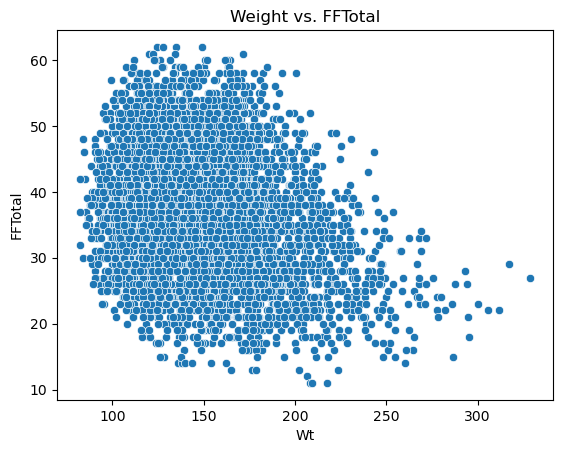

In [10]:
sns.scatterplot(data=df_cleaned, x='Wt', y='FFTotal')
plt.title('Weight vs. FFTotal')
plt.show()

**Analysis:** 

The scatterplot shows a slight negative correlation between Weight and FFTotal meaning that as weight increases, we can generally expect the FFTotal to decrease. Since data points are still fairly scattered between varying weights, we can assume there is little correlation between the two variables and should keep in mind only use it to some extent in our equation to calculate FFTotal. We can increase the importance of Weight in calculating the FFTotal as it increasing and goes above a certain threshold as we can see that higher weights can generally indicate lower FFTotal scores.

### Stage Completion Analysis
<a id="Stage-Completion-Analysis"></a>

#### Fitness Scores by Cycle Ergometer Test Stages (Boxplot)

**Boxplot:**

- FFTotal scores increase as the stages increase. 
- Subjects who are able to complete a higher number of stages will have an increased likelihood of having a higher FFTotal.

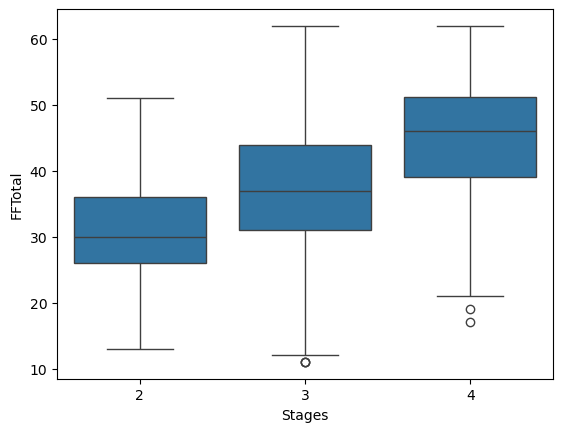

In [11]:
sns.boxplot(data=df_cleaned, x='Stages', y='FFTotal')
plt.show()


**Analysis:**

We can see that there is a clear correlation between 'Stages' and 'FFTotal' as the boxplot indicates a clear increase in fitness scores as the stages increase. With this knowledge, we can safely assume that 'Stages' will be an important variable in calculating FFTotal and can make sure to include it as part of our equation.

### Grip Strength Analysis
<a id="Grip-Strength-Analysis"></a>

#### Combined Grip Strength vs. Fitness Scores (Scatterplot)

**Scatterplot:**

- Left and right grip strength are summed.
- The correlation between total grip strength and fitness scores appears stronger and more evident when the data is separated by gender.

In [12]:
df_copy = df_cleaned.copy()
df_copy['total_grip_strength'] = df_cleaned['RGM'] + df_cleaned['LGM']
(
    ggplot(data=df_copy, mapping=aes(x="total_grip_strength", y="FFTotal"))
    + geom_point(alpha=0.3, color='black')
    + facet_wrap('Sex')
)


**Analysis:**

Initially, we plotted total grip strength against Fitness Scores for all individuals, but found little to no correlation. However, recognizing the potential influence of biological differences between men and women, we separated the data by gender. This adjustment revealed a clearer correlation within each group.

Notably, both genders share a similar range of fitness scores (i.e., the minimum and maximum values are virtually identical). Despite males having a higher maximum grip strength, this suggests that the fitness score formula likely normalizes grip strength, accounting for differences in physical capabilities between genders.

### Skinfold Thickness Analysis
<a id="Skinfold-Thickness-Analysis"></a>

#### Combined Skinfold Measurements vs. Fitness Scores (Scatterplot)

**Scatterplot:**

- All three skin fold measurements are summed as one
- Overall negative correlation

In [13]:
df_copy['skinfold_sum'] = df_cleaned['SF 1'] + df_cleaned['SF 2'] + df_cleaned['SF 3']
(
    ggplot(data=df_copy, mapping=aes(x="skinfold_sum", y="FFTotal"))
    + geom_point(alpha=0.4, color='blue')
)



**Analysis:**

The length of skin folds in three different areas of the body shows a moderate negative correlation with an individual's fitness score. As the skin fold lengths increase, the fitness score tends to decrease. These variables could be used, along with a transformed variable such as BMI, to provide a more accurate assessment of an individual's body composition.

### Vital Capacity Analysis
<a id="Vital-Capacity-Analysis"></a>

#### Correlation Between Vital Capacity and Fitness Scores (Scatterplot)

**Scatterplot:**

- Weak positive correlation

In [14]:
(
    ggplot(data=df_copy, mapping=aes(x='VC', y='FFTotal'))
    + geom_point(alpha=0.3)
)



**Analysis:**

Vital capacity, the maximum amount of air exhaled after taking a deep breath, shows a visible but weak correlation with an individual's fitness score. This suggests that while vital capacity alone may not be a strong predictor of fitness, combining it with other variables could potentially enhance its usefulness in calculating the fitness score.

### Heart Rate at Stage 2 Analysis
<a id="Heart-Rate-at-Stage-2-Analysis"></a>

#### Stage 2 Heart Rate vs. Fitness Scores (Scatterplot)

**Scatterplot:**
- Moderate negative correlation
- Two visible outliers

In [15]:
(
    ggplot(data=df_copy, mapping=aes(x='HR 2', y='FFTotal'))
    + geom_point(alpha=0.3)
)


In [16]:
# Create a clean copy of the DataFrame
df_cleaned = df.copy()

# Define column groups and initialize imputation summary
column_groups = {
    'Moderate Missing': ['SF 1', 'SF 2', 'SF 3'],
    'Low Missing': ['PL 3', 'HR 3', 'RPE 3']
}

imputation_summary = []

# Impute missing values and collect summary
for group_name, columns in column_groups.items():
    for col in columns:
        before_count = df_cleaned[col].isnull().sum()
        mean_val = df_cleaned[col].mean()
        df_cleaned[col] = df_cleaned[col].fillna(mean_val)
        after_count = df_cleaned[col].isnull().sum()
        
        imputation_summary.append({
            'Group': group_name,
            'Column': col,
            'Initial Missing': before_count,
            'After Imputation': after_count,
            'Values Imputed': before_count - after_count
        })

# Convert the imputation summary to a DataFrame
summary_df = pd.DataFrame(imputation_summary)

# Format and display the results
summary_df.style\
    .format({
        'Initial Missing': '{:,.0f}', 
        'Values Imputed': '{:,.0f}'
    })\
    .set_caption("Summary of Imputation Process")


,Group,Column,Initial Missing,After Imputation,Values Imputed
0,Moderate Missing,SF 1,"1,596",0,"1,596"
1,Moderate Missing,SF 2,"1,596",0,"1,596"
2,Moderate Missing,SF 3,"1,596",0,"1,596"
3,Low Missing,PL 3,380,0,380
4,Low Missing,HR 3,380,0,380
5,Low Missing,RPE 3,393,0,393


1. Body Composition Metrics
- Skinfold Sum ($SF_{total}$): $SF_1 + SF_2 + SF_3$
- Body Mass Index: $BMI = \frac{Weight \times 703}{Height^2}$


2. Performance Metrics
- Power Endurance Index ($PEI$): $\frac{1}{2}(\frac{PL_2}{PL_1} + \frac{PL_3}{PL_2})$
- Average Power per BPM: $\frac{1}{3}(\frac{PL_1}{HR_1} + \frac{PL_2}{HR_2} + \frac{PL_3}{HR_3})$


3. Cardiovascular Fitness

- VO₂ Max: $0.2 \times Stages + 0.9 \times PL_3 + 3.5$

In [17]:
# Replace zeros with NaN
df_cleaned = df_cleaned.replace(0, np.nan)

# Create body composition metrics
df_cleaned['Skinfold_Sum'] = df_cleaned[['SF 1', 'SF 2', 'SF 3']].sum(axis=1)
df_cleaned['BMI'] = (df_cleaned['Wt'] * 703) / (df_cleaned['Ht'] ** 2)

# Create strength metrics
df_cleaned['Total_Grip_Strength'] = df_cleaned['RGM'] + df_cleaned['LGM']

# Create performance metrics
df_cleaned['Power_Endurance_Index'] = (
    df_cleaned['PL 2'] / df_cleaned['PL 1'] + 
    df_cleaned['PL 3'] / df_cleaned['PL 2']
) / 2

power_cols = ['PL 1', 'PL 2', 'PL 3']
hr_cols = ['HR 1', 'HR 2', 'HR 3']

# Calculate 'Average_Power_Per_BPM'
df_cleaned['Average_Power_Per_BPM'] = (
    df_cleaned[power_cols].divide(df_cleaned[hr_cols].values)›
).mean(axis=1)

# Create cardiovascular fitness metrics
df_cleaned['VO2_Max'] = (0.2 * df_cleaned['Stages']) + (0.9 * df_cleaned['PL 3']) + 3.5

# Create combined metrics
df_cleaned['Endurance_Efficiency'] = (
    df_cleaned['Power_Endurance_Index'] * df_cleaned['Average_Power_Per_BPM']
)
df_cleaned['Strength_to_Body_Weight'] = df_cleaned['Total_Grip_Strength'] / df_cleaned['Wt']

# Define transformed features
transformed_features = [
    'Skinfold_Sum', 'Total_Grip_Strength', 'Power_Endurance_Index',
    'Average_Power_Per_BPM', 'BMI', 'VO2_Max', 'Endurance_Efficiency',
    'Strength_to_Body_Weight'
]

# Generate summary statistics for transformed features
df_cleaned[transformed_features].describe().style\
    .format(precision=2)\
    .set_caption("Summary Statistics of Transformed Features")


,Skinfold_Sum,Total_Grip_Strength,Power_Endurance_Index,Average_Power_Per_BPM,BMI,VO2_Max,Endurance_Efficiency,Strength_to_Body_Weight
count,6276.00,6276.00,6276.00,6276.00,6276.00,6276.00,6276.00,6276.00
mean,59.12,75.51,1.78,0.58,23.50,119.30,1.07,0.52
std,20.82,22.82,0.22,0.22,4.17,41.45,0.50,0.12
min,12.00,28.00,1.20,0.27,14.18,67.10,0.41,0.14
25%,47.20,58.00,1.53,0.36,20.63,71.60,0.55,0.43
50%,59.12,69.00,1.75,0.55,22.72,119.09,1.00,0.51
75%,67.00,93.00,1.95,0.76,25.50,161.60,1.44,0.59
max,155.00,161.00,2.73,1.42,45.01,184.30,2.47,0.98


In [25]:
# Select numeric columns
numeric_cols = df_cleaned.select_dtypes(include=[np.number]).columns

# Calculate correlations with 'FFTotal'
correlations = df_cleaned[numeric_cols].corr()['FFTotal'].sort_values(ascending=False)

# Prepare a DataFrame for the top 20 correlations
top_correlations = pd.DataFrame({
    'Feature': correlations.index,
    'Correlation': correlations.values
}).head(20)

# Display the top 15 correlations with 'FFTotal'
top_correlations.style\
    .format({'Correlation': '{:.3f}'})\
    .set_caption("Top 15 Correlations with FFTotal")


,Feature,Correlation
0,FFTotal,1.000
1,Strength_to_Body_Weight,0.537
2,FF,0.442
3,Endurance_Efficiency,0.331
4,Average_Power_Per_BPM,0.327
5,Stages,0.285
6,VO2_Max,0.284
7,PL 3,0.283
8,Total_Grip_Strength,0.275
9,RGM,0.272


In [19]:
# Variable to analyze
var = 'Sex'

# Drop rows with missing values in 'Sex' and 'FFTotal'
data = df_cleaned.dropna(subset=[var, 'FFTotal'])

# Perform ANOVA
groups = [group['FFTotal'].values for name, group in data.groupby(var)]
f_stat, p_val = stats.f_oneway(*groups)

# Display ANOVA results
print(f"ANOVA Results for {var}:")
print(f"F-statistic: {f_stat:.3f}")
print(f"p-value: {p_val:.3f}\n")

# Calculate group statistics for the variable
group_stats = data.groupby(var)['FFTotal'].agg(['count', 'mean', 'std']).round(3)

# Display group statistics with formatting
group_stats.style\
    .format({'mean': '{:.2f}', 'std': '{:.2f}'})\
    .set_caption(f"Summary Statistics by {var}")

ANOVA Results for Sex:
F-statistic: 66.010
p-value: 0.000



,count,mean,std
Sex,,,
F,3619,36.46,9.00
M,2657,38.36,9.36


## Modeling and Analysis
<a id="Modeling-and-Analysis"></a>

In [21]:
# Encode 'Sex' as binary (Female = 0, Male = 1)
df_cleaned['Sex_Encoded'] = LabelEncoder().fit_transform(df_cleaned['Sex'])

# Prepare each model separately
def evaluate_model(model_name, features):
    # Prepare data
    X = df_cleaned[features].dropna()
    y = df_cleaned.loc[X.index, 'FFTotal']
    
    # Split data with test_size=0.5
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.5, random_state=42
    )
    
    # Train model
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    # Coefficients
    coefficients = pd.DataFrame({
        'Feature': features,
        'Coefficient': model.coef_
    }).sort_values(by='Coefficient', key=abs, ascending=False)
    
    # Display results
    display(pd.DataFrame({'Metric': ['R^2', 'RMSE'], 'Value': [r2, rmse]}))
    display(coefficients)

# Define features for each model
base_model_1_features = ['Strength_to_Body_Weight', 'FF', 'Sex_Encoded']
base_model_2_features = ['Endurance_Efficiency', 'Average_Power_Per_BPM', 'Sex_Encoded']
transformed_model_1_features = ['VO2_Max', 'Stages', 'Sex_Encoded']
transformed_model_2_features = ['Total_Grip_Strength', 'PL 3', 'Sex_Encoded']
comprehensive_model_features = [
    'Strength_to_Body_Weight', 'FF', 'Endurance_Efficiency', 
    'Average_Power_Per_BPM', 'VO2_Max', 'Stages', 
    'Total_Grip_Strength', 'PL 3', 'Sex_Encoded'
]

# Evaluate each model
evaluate_model("Base Model 1", base_model_1_features)
evaluate_model("Base Model 2", base_model_2_features)
evaluate_model("Transformed Model 1", transformed_model_1_features)
evaluate_model("Transformed Model 2", transformed_model_2_features)
evaluate_model("Comprehensive Model", comprehensive_model_features)


,Metric,Value
0,R^2,0.545845
1,RMSE,6.158964


,Feature,Coefficient
0,Strength_to_Body_Weight,48.845409
2,Sex_Encoded,-2.174587
1,FF,1.303224


,Metric,Value
0,R^2,0.169825
1,RMSE,8.286348


,Feature,Coefficient
1,Average_Power_Per_BPM,31.860460
2,Sex_Encoded,-10.009502
0,Endurance_Efficiency,0.918060


,Metric,Value
0,R^2,0.171763
1,RMSE,8.276671


,Feature,Coefficient
2,Sex_Encoded,-9.067099
1,Stages,6.563623
0,VO2_Max,0.152006


,Metric,Value
0,R^2,0.204664
1,RMSE,8.110612


,Feature,Coefficient
2,Sex_Encoded,-14.836396
0,Total_Grip_Strength,0.189985
1,PL 3,0.128784


,Metric,Value
0,R^2,0.738723
1,RMSE,4.671493


,Feature,Coefficient
0,Strength_to_Body_Weight,59.722200
3,Average_Power_Per_BPM,32.472254
8,Sex_Encoded,-11.723067
5,Stages,3.792250
1,FF,1.134056
2,Endurance_Efficiency,-0.934718
4,VO2_Max,0.423340
7,PL 3,-0.372344
6,Total_Grip_Strength,-0.124658
